# ICT707 Task 3 - Part 1 


### Instructions

* Follow instructions on 'Google Colab for Task3.doc' for running this notebook:


* 1.	Visit and log in to Google Colab site: https://colab.research.google.com/
* 2.	Download this notebook from Blackboard and then upload it to Colab
* 3. 	Run “PySpark Environment Setting” cell to get spark and pySpark installed.
* 4.	Type in your NAME and ID in the first coding cell.
* 5.	Place the data files on the correct GDrive folder - 'Colab Notebooks'.
* 6. 	Run the first cell of “Connect GDrive for data set files” to mount GDrive as the storage of data files. Follow the instruction to complete the authorization of using GDrive. 
* 7.    Run Imports
* 8.    Create Spark Session
* 9.    Load CSV file and test

* **After you finish, make sure all cells are executed. Go to menu "File->Download .ipynb" to download your work as 2 files: (1) a Jupyter notebook file and (2) a HTML file. And then submit both files to Blackboard.**

* If you see any error related to spark context, please **run the last cell** and then retry. Or reload the notebook and install the PySpark environment.

## 0 Task 3 Setup
### 1 PySpark Environment Setting

In [ ]:
# Please run this cell to get Java and spark installed
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install pyspark==2.4.7

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [917 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.lau

### 2 Enter your NAME and ID


In [ ]:
# Please enter your NAME and student ID
NAME = "Aman Babbar"
ID = "1122515"

### 3 Add data file

In [ ]:
# Make sure you have relevant data files uploaded, replace 'text_file_name.csv' with your csv file
# And then use the correct data file names below
datafile_1 = "/content/gdrive/My Drive/Colab Notebooks/rating.csv"
datafile_2 = "/content/gdrive/My Drive/Colab Notebooks/movies.csv"

### 4 Connect GDrive for data set files

In [ ]:
# Mount the cloud folder for data file storage
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


### 5 Run Imports

In [ ]:
# Imports utilised
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression 
from pyspark.ml.evaluation import RegressionEvaluator

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### 6 Create Spark Session

In [ ]:
# Create Spark Session

sc = SparkSession.builder\
        .master('local[*]') \
        .appName('ICT707_Task3') \
        .getOrCreate()


### 7 Load CSV File

In [ ]:
# file should display the head() records without errors 
# Loading csv file for PySpark and Python 3
data = sc.read.csv(datafile_1, inferSchema = True, header = True)
movie_title = pd.read_csv(datafile_2)
data.head()

Row(userId=1, movieId=1, rating=4.0, timestamp=964982703)

## 1 Exploratory Data Analysis
##### • telling its number of rows and columns,
##### • doing the data cleaning (missing values or duplicated records) if necessary
##### • selecting 3 columns, and drawing 1 plot (e.g. bar chart, histogram, boxplot, etc.) for each to summarise it

In [ ]:
# To be able to visualise the data, the dataframe must be transferred to pandas
data_pandas = data.toPandas()
data_pandas.shape

(100836, 4)

### 1.1 EDA - Description

In [ ]:
#checking the parameters in the data
data_pandas.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [ ]:
#checking unique number of ratings
data_pandas['rating'].unique()

array([4. , 4.5, 2.5, 3.5, 3. , 5. , 0.5, 2. , 1.5, 1. ])

In [ ]:
movie_title.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# telling its number of rows and columns,
s = data_pandas.shape
print("Rows = ", s[0])
print("Columns = ", s[1])

Rows =  100836
Columns =  4


In [ ]:
data_pandas= pd.merge(data_pandas,movie_title,on='movieId')
data_pandas.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


### 1.2 EDA - Cleaning

In [ ]:
# doing the data cleaning (missing values or duplicated records) if necessary
#removing any missing values
data_pandas = data_pandas.dropna()

In [ ]:
#checking for duplicated values
duplicate = data_pandas[data_pandas.duplicated()]
duplicate

,userId,movieId,rating,timestamp,title,genres


### 1.3 EDA - Graphs

In [ ]:
# Lets sort them and see which movie has the highest mean of ratings.
New_data=pd.DataFrame(data_pandas.groupby(by='title')['rating'].mean())
New_data['No. of people Rated']=data_pandas.groupby(by='title')['rating'].count()
New_data = pd.merge(New_data,movie_title,on='title')
New_data = New_data.sort_values(by = 'No. of people Rated', ascending = False)
New_data.head(10)

,title,rating,No. of people Rated,movieId,genres
3161,Forrest Gump (1994),4.164134,329,356,Comedy|Drama|Romance|War
7597,"Shawshank Redemption, The (1994)",4.429022,317,318,Crime|Drama
6868,Pulp Fiction (1994),4.197068,307,296,Comedy|Crime|Drama|Thriller
7684,"Silence of the Lambs, The (1991)",4.161290,279,593,Crime|Horror|Thriller
5515,"Matrix, The (1999)",4.192446,278,2571,Action|Sci-Fi|Thriller
8005,Star Wars: Episode IV - A New Hope (1977),4.231076,251,260,Action|Adventure|Sci-Fi
4665,Jurassic Park (1993),3.750000,238,480,Action|Adventure|Sci-Fi|Thriller
1337,Braveheart (1995),4.031646,237,110,Action|Drama|War
8367,Terminator 2: Judgment Day (1991),3.970982,224,589,Action|Sci-Fi
7425,Schindler's List (1993),4.225000,220,527,Drama|War


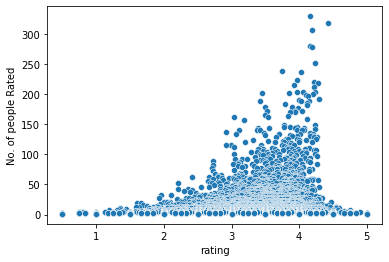

In [ ]:
#selecting 3 columns, and drawing 1 plot (e.g. bar chart, histogram, boxplot, etc.) for each to summarise it
# graph 1 scatterplot
sns.scatterplot(x = 'rating', y = 'No. of people Rated', data = New_data)

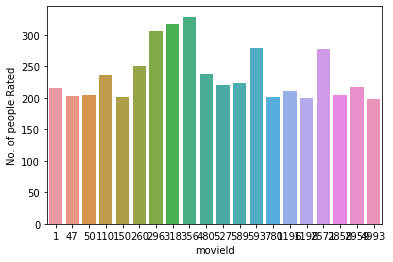

In [ ]:
# graph 2 bar plot top 10 highest rated movies
nd = New_data.head(20)
sns.barplot(x = 'movieId', y = 'No. of people Rated', data = nd)

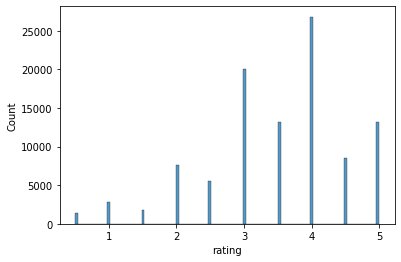

In [ ]:
# graph 3 histogram
sns.histplot(data_pandas['rating'])

## 2 Recommendation Engine
#### This subtask requires you to implement a recommender system on Collaborative filtering with Alternative Least Squares Algorithm. 
#### You need to include
##### • Model training and predictions
##### • Model evaluation using MSE

In [ ]:
# Splitting the data into Training and Test data that is used for both Task I.2 and Task I.3
# hint: training_data, testing_data = data.randomSplit([???,???])
training_data, testing_data = data.randomSplit([0.8, 0.2], 1)
training_data.count()

80628

In [ ]:
#Recommendation system using Alternative Least Squares Algorithm
# hint: als = ALS(maxIter=??,regParam=??,userCol = "???", itemCol = "???", ratingCol = "???", coldStartStrategy = "???")
# hint: model = als.fit(???)
als = ALS(maxIter=20,regParam=0.05,userCol = "userId", itemCol = "movieId", ratingCol = "rating", coldStartStrategy = "drop")
model = als.fit(training_data)

In [ ]:
#Evaluate the model using Mean Square Error
# hint: predictions = model.transform(????)
# hint: evaluator = RegressionEvaluator(?????)
# hint: mse = evaluator.evaluate(????)
predictions = model.transform(testing_data)
evaluator = RegressionEvaluator(metricName="mse",labelCol="rating",predictionCol="prediction")
mse = evaluator.evaluate(predictions)
print(mse)

0.8910080132069791


## 3 Classification
#### This subtask requires you to implement a classification system with Logistic regression. 
#### You need to include
##### • Logistic Regression model training
##### • Model evaluation


In [ ]:
# Logistic Regression
# hint: assembler = VectorAssembler().setInputCols([???????,????]).setOutputCol(????)
# hint: train_vector = assembler.transform(?????)

assembler = VectorAssembler().setInputCols(["userId","movieId"]).setOutputCol("features")
train_vector = assembler.transform(data)
indexer = StringIndexer(inputCol="rating", outputCol="label")
indexed = indexer.fit(train_vector).transform(train_vector)
indexed

DataFrame[userId: int, movieId: int, rating: double, timestamp: int, features: vector, label: double]

In [ ]:
#train test split
training_data, testing_data = indexed.randomSplit([0.8, 0.2], 1)
training_data.count()

80628

In [ ]:
# Create the Logistic Regression Model and train it
# hint: lr = LogisticRegression()
# hint: lr_model = lr.fit(?????)
lr = LogisticRegression(maxIter=20, regParam=0.05, elasticNetParam=0.8, featuresCol = 'features', labelCol = 'label')
lr_model = lr.fit(training_data)

In [ ]:
# Test the model
# hint: test_vector = assembler.transform(testing)
# hint: test_vector = test_vector.select("features", "label")
# hint: test_vector = lr_model.transform(test_vector)
# hint:
test_vector = lr_model.transform(testing_data)
train_vector = lr_model.transform(training_data)
train_vector.show()

+------+-------+------+---------+-----------+-----+--------------------+--------------------+----------+
|userId|movieId|rating|timestamp|   features|label|       rawPrediction|         probability|prediction|
+------+-------+------+---------+-----------+-----+--------------------+--------------------+----------+
|     1|      1|   4.0|964982703|  [1.0,1.0]|  0.0|[1.35919048143069...|[0.26510619476774...|       0.0|
|     1|      3|   4.0|964981247|  [1.0,3.0]|  0.0|[1.35919048143069...|[0.26510619476774...|       0.0|
|     1|      6|   4.0|964982224|  [1.0,6.0]|  0.0|[1.35919048143069...|[0.26510619476774...|       0.0|
|     1|     47|   5.0|964983815| [1.0,47.0]|  2.0|[1.35919048143069...|[0.26510619476774...|       0.0|
|     1|     70|   3.0|964982400| [1.0,70.0]|  1.0|[1.35919048143069...|[0.26510619476774...|       0.0|
|     1|    101|   5.0|964980868|[1.0,101.0]|  2.0|[1.35919048143069...|[0.26510619476774...|       0.0|
|     1|    110|   4.0|964982176|[1.0,110.0]|  0.0|[1.3

In [ ]:
# Model Evaluation using Root Mean Square Error (RMSE)
# hint: rmse_test = evaluator.evaluate(?????, {evaluator.metricName: "rmse"})
# hint: rmse_train = evaluator.evaluate(?????, {evaluator.metricName: "rmse"})
#print("RMSE for Test:",rmse_test)
#print("RMSE for Train:",rmse_train)
rmse_test = evaluator.evaluate(test_vector, {evaluator.metricName: "rmse"})
rmse_train = evaluator.evaluate(train_vector, {evaluator.metricName: "rmse"})
print("RMSE for Test:",rmse_test)
print("RMSE for Train:",rmse_train)

RMSE for Test: 3.6585933532744397
RMSE for Train: 3.652170190484411


## Shut down SparkContext when exiting

If you have error messages related to sparkContext, try to run the following cell, and then rerun all cells.

In [ ]:
sc.stop()